# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

In [1]:
A = read.csv("anes_pilot_2018.csv")

Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async videos and readings.  These include both paired and unpaired t-tests, Wilcoxon rank-sum test, Wilcoxon signed-rank test, and sign test.  You may select a one-tailed or two-tailed test.

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.**
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 4500 words, not counting code or figures.  We will use some python code like the following to perform the wordcount on your notebook or Rmd file.

```
import nbformat

with open('W203_Lab_2.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    total_words = 0

    for cell in nb['cells']:
        if cell['cell_type'] == 'markdown':
            total_words += len(cell['source'].split())
    print("Total words:", total_words)
```

**Hint:** When answering questions about the potential gaps between conceptual and operational definitions it is often helpful to ask yourself "If I could do anything I wanted, including borrowing Rick's portal gun, or doing an FMRI scan on all survey takers, to operationalize this particular concept how would I do it" and then explain how that is different than what is actually measured.   

## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

Respondents were asked to rate journalists and police between 0 and 100 between a "very cold or unfavorable feeling" and a "very warm or favorable feeling." One major gap is that while we aim to determine whether US voters have more respect for police or journalists, this question only asks for favorability. The assumption here is that favorability is tightly tied to respect and will thus miss situations where someone may respect police/journalists even if that person does not like them.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

While the ratings of journalists are not missing any values, the summary and histogram show that there are a few negative ratings. As the documentation for the survey shows that 0 should be the lowest rating that one can give, we conclude that the negative ratings are coding errors. We will remove these.

Otherwise, we see that journalist favorability has peaks at 0, 50, and 100. 

[1] "Number of missing values: " "0"

[1] "Standard deviation: " "32.5681372827251"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

[1] "Number of samples: " "2498"

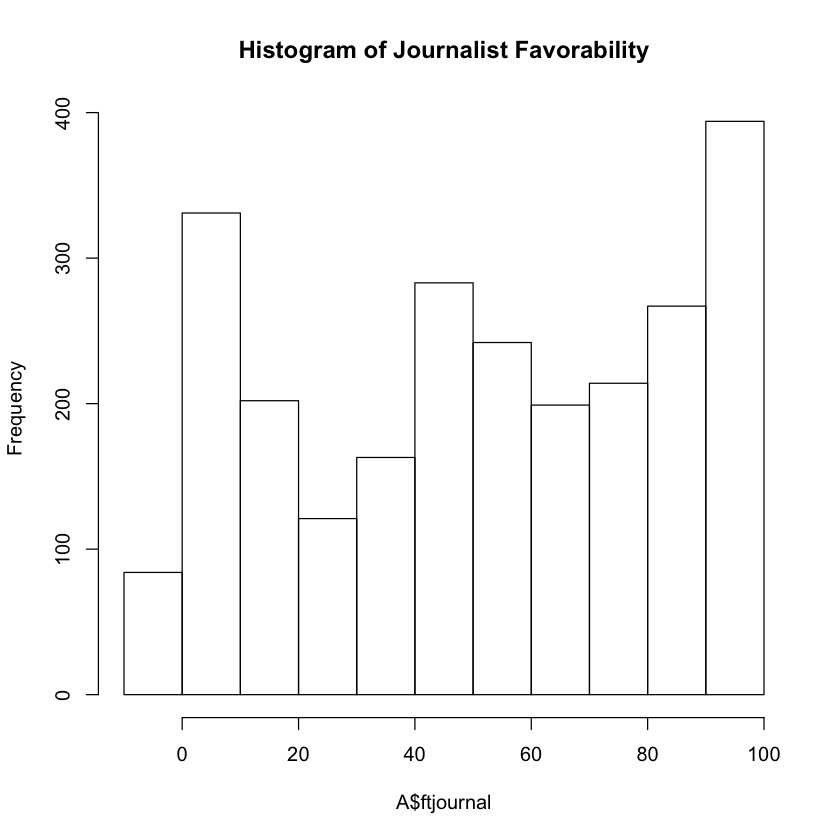

In [26]:
# EDA of Journalist Favorability
c("Number of missing values: ", sum(is.na(A$ftjournal)))
c("Standard deviation: ", sd(A$ftjournal))
summary(A$ftjournal)
hist(A$ftjournal, main="Histogram of Journalist Favorability")
journalists = A$ftjournal[which(A$ftjournal>=0)]
c("Number of samples: ", length(journalists))

The ratings of police are not missing any values. While police ratings also have peaks at 0, 50, and 100, there is a much larger peak at 100 for police than for journalists. Police ratings have a large left skew.

[1] "Number of missing values: " "0"

[1] "Standard deviation: " "28.7838575097442"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 

[1] "Number of samples: " "2500"

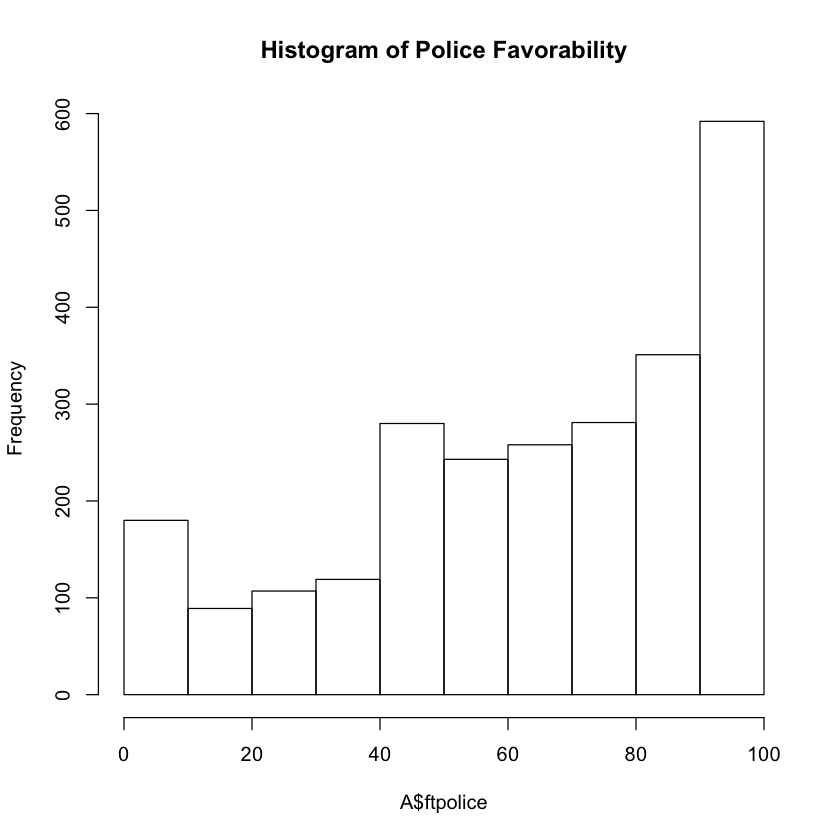

In [27]:
# EDA of Police Favorability
c("Number of missing values: ", sum(is.na(A$ftpolice)))
c("Standard deviation: ", sd(A$ftpolice))
summary(A$ftpolice)
hist(A$ftpolice, main="Histogram of Police Favorability")
police = A$ftpolice
c("Number of samples: ", length(police))

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

Based on the EDA, we believe that the two-tailed unpaired t-test would be the most appropriate to determine whether journalists or police are viewed with more respect.

Because we have no supported belief that either respect of police is higher than that of journalists or vice versa, we go with a 2-tailed rather than a 1-tailed t-test.

In order to confirm that the two features are:
* Quantitative (rather than ordinal or nominal)
* Independent and identically distributed
* Relatively normally distributed

For both the police and journalist scores, we see that:
* The data is quantitative as presumably, the difference between 0 and 1 in the favorability metric should be the same distance as between 99 and 100. Note that this is an assumption that we are making despite the fact that 0 is defined as "very cold or unfavorable feeling" and a 100 is defined as "very warm or favorable feeling," both of which are highly qualitative.
* IID as we assume that individuals who answered the survey did not talk to subsequent respondents to try to affect their responses
* Even though the police scores are more multi-modal than truly normally distributed and even though journalist scores are heavily left skewed, because there are many samples (~2500) and the t-test is relatively robust to non-normality, we assume that the t-test is OK.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

# NEED TO CALCULATE COHEN'S D OR OTHER MEASUREMENT FOR EFFECT SIZE

Based on the results of the t-test below, we can reject the null hypothesis that police and journalists are respected equally. The t-test shows that the average rating for journalists is 52 and the average rating for police is 65. The difference is significant to a p-value of 2.2e-16, that there is a <<1% chance that we would see such a large difference in ratings if we assume that the population average ratings of both police and journalists are the same.

Instead, it seems that police are rated higher than journalists.

In [28]:
t.test(journalists, police)


	Welch Two Sample t-test

data:  journalists and police
t = -14.237, df = 4921.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.07666 -10.66924
sample estimates:
mean of x mean of y 
 52.31185  64.68480 


## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.